In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
folder = Path("./070")

- (A-2b) Identifikujte aj prvotne riešte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy (riadky, stlpce), nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

## Dataset 1: **connections.csv**

In [3]:
data1 = pd.read_csv(folder / "connections.csv", delimiter="\t", parse_dates=['ts'])
data1.info()
# print(len(data1['imei'].unique()))
# data1.sort_values(['imei', 'ts']).head(20)
#print(len(data1.loc[:,['ts',"imei"]].unique()))

# in every data set where ts comulmn is present, it has to be converted to a datetime type from an object(string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts                 15068 non-null  datetime64[ns]
 1   imei               15068 non-null  int64         
 2   mwra               15068 non-null  float64       
 3   c.android.youtube  15068 non-null  float64       
 4   c.katana           15068 non-null  float64       
 5   c.dogalize         15068 non-null  float64       
 6   c.android.chrome   15068 non-null  float64       
 7   c.android.gm       15068 non-null  float64       
 8   c.UCMobile.x86     15068 non-null  float64       
 9   c.raider           15068 non-null  float64       
 10  c.android.vending  15068 non-null  float64       
 11  c.updateassist     15068 non-null  float64       
 12  c.UCMobile.intl    15068 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

In [4]:
data1.describe()
# we can now work with all columns in this data set as numeric

,ts,imei,mwra,c.android.youtube,c.katana,c.dogalize,c.android.chrome,c.android.gm,c.UCMobile.x86,c.raider,c.android.vending,c.updateassist,c.UCMobile.intl
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,14.224016,12.933420,11.213860,11.748367,12.395181,49.691045,50.304422,49.846238,49.795751,49.805725
min,2018-05-05 10:00:00,3.590434e+17,0.000000,5.205940,3.670310,1.794050,1.332370,3.978430,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,12.887115,11.041332,9.468405,9.869288,10.526928,24.404520,25.599992,24.614873,24.474610,24.732795
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,14.228200,13.045560,11.071870,11.595440,12.587570,49.596390,50.565775,49.828965,49.450900,49.536500
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,15.546828,14.838530,12.841680,13.576078,14.323585,74.844188,75.281260,75.347318,75.000933,74.833070
max,2018-05-15 18:08:00,8.630331e+18,1.000000,22.757320,22.669430,21.240890,22.079670,20.083960,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.016526,2.685007,2.567502,2.700146,2.509716,28.923322,28.806473,29.013212,28.962832,28.841978


In [5]:
# lets first check for missing values
data1.isna().sum()
# there are not missing values in any columns

ts                   0
imei                 0
mwra                 0
c.android.youtube    0
c.katana             0
c.dogalize           0
c.android.chrome     0
c.android.gm         0
c.UCMobile.x86       0
c.raider             0
c.android.vending    0
c.updateassist       0
c.UCMobile.intl      0
dtype: int64

In [6]:
# check for duplicates and clear them
print(f'count of duplicated rows: {len(data1.loc[data1.duplicated(), :])}')
data1_dupless = data1.loc[~data1.duplicated(), :]  # full rows

# data1.loc[~data1.duplicated(subset="c.android.youtube"), :] # duplicates only in that column


count of duplicated rows: 179


In [7]:
# we will define function for calculating outliers here
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

# also define function that will output cont and % of outliers
def print_outliers_stat(df):
    for column in df:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            outliers = identify_outliers(df[column])  # Assuming this is a function you've defined elsewhere
            print(f'{column}: {len(outliers)} => {(len(outliers) * 100) / len(df[column]):.2f}%')
            


In [8]:
print_outliers_stat(data1_dupless)
# by this stats we can clip the outliers
# clipping outliers
data1_dupless_clip = data1_dupless.drop(identify_outliers(data1_dupless['c.android.youtube']).index)
# data1.drop(identify_outliers(data1['c.katana']).index)

imei: 0 => 0.00%
mwra: 0 => 0.00%
c.android.youtube: 148 => 0.99%
c.katana: 47 => 0.32%
c.dogalize: 152 => 1.02%
c.android.chrome: 71 => 0.48%
c.android.gm: 8 => 0.05%
c.UCMobile.x86: 0 => 0.00%
c.raider: 0 => 0.00%
c.android.vending: 0 => 0.00%
c.updateassist: 0 => 0.00%
c.UCMobile.intl: 0 => 0.00%


In [9]:
# define function for visualising numeric data in histograms
def show_hist(df):
    for column in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(5, 5))
        df[column].hist(bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


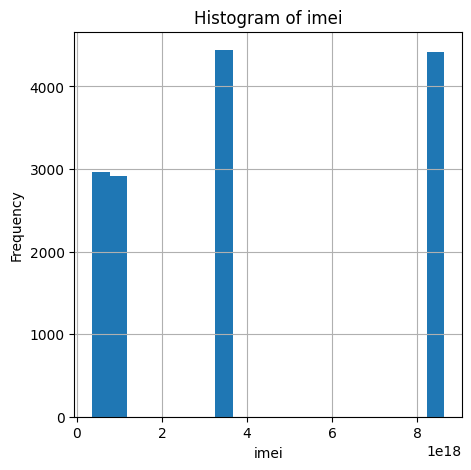

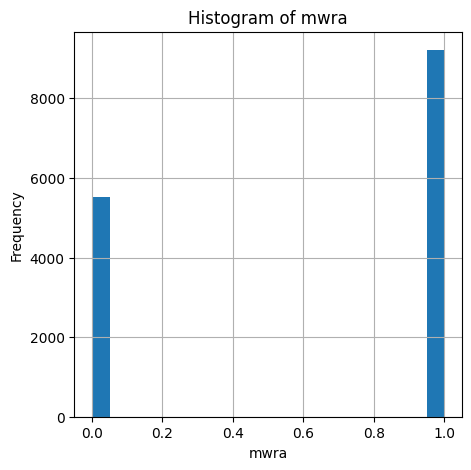

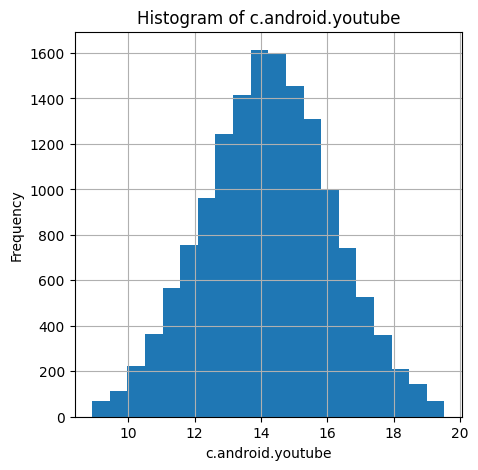

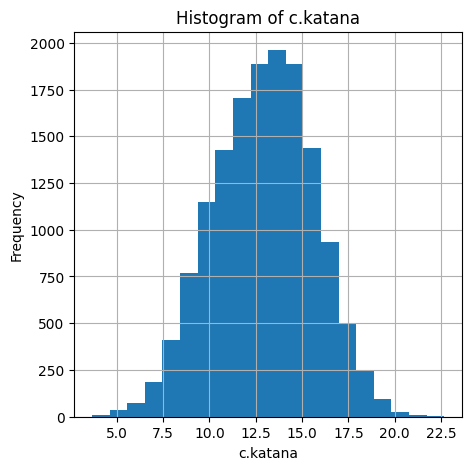

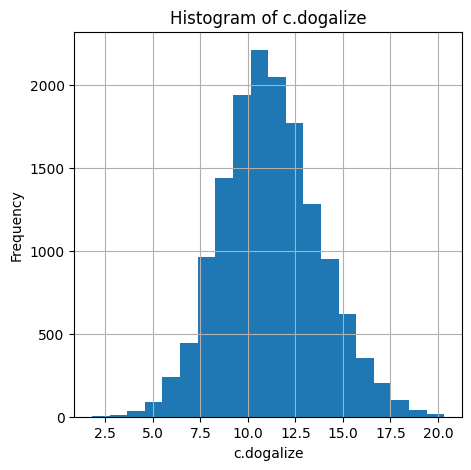

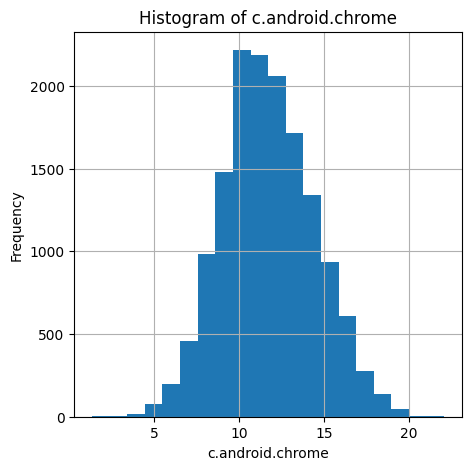

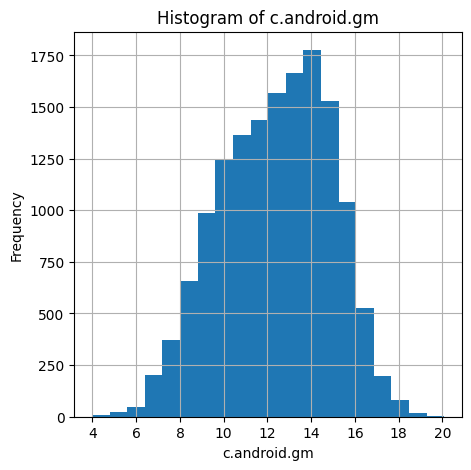

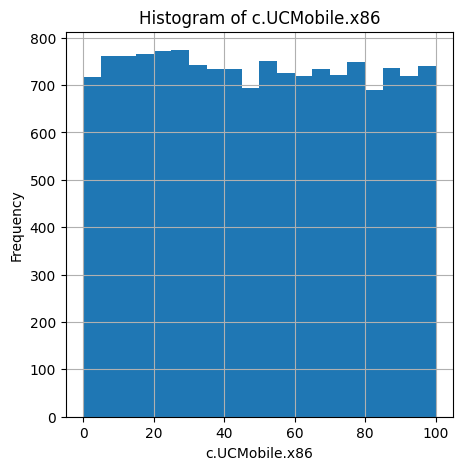

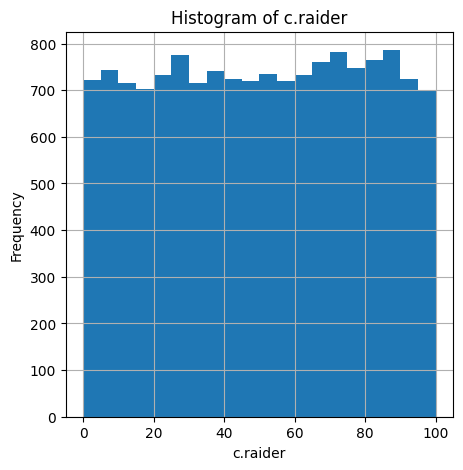

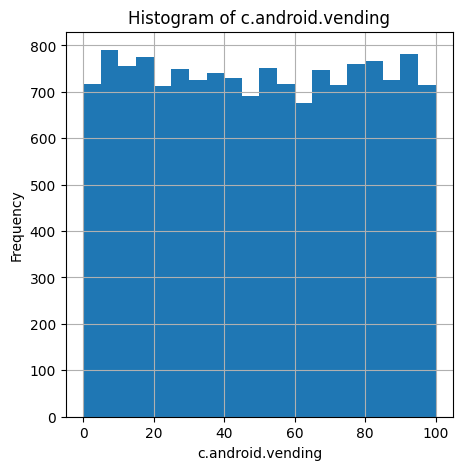

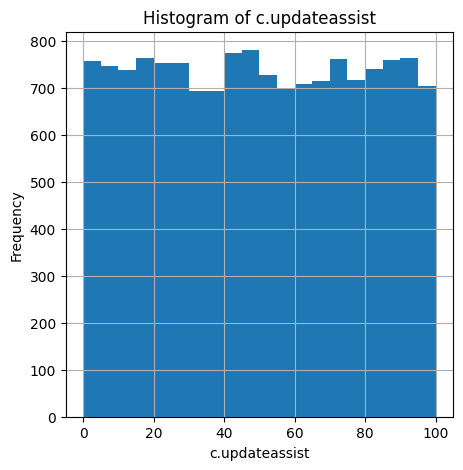

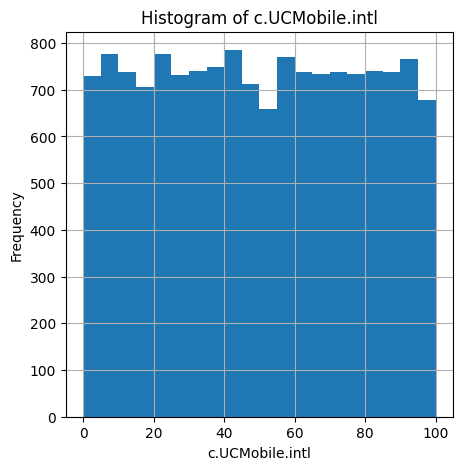

In [10]:
show_hist(data1_dupless_clip)

## Dataset 2: **devices.csv**

In [11]:
# we will now perform the same procedure on the other 3 datasets
data2 = pd.read_csv(folder / "devices.csv", delimiter="\t")
data2.info()


# print(len(data2['imei'].unique()))
# data2.sort_values('imei').head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2889 non-null   float64
 1   longitude   2889 non-null   float64
 2   store_name  2889 non-null   object 
 3   code        2887 non-null   object 
 4   location    2889 non-null   object 
 5   imei        2889 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 135.5+ KB


In [12]:
data2.head()

,latitude,longitude,store_name,code,location,imei
0,32.50070,-94.74049,Longview,US,America/Chicago,863033069630348388
1,50.80904,8.77069,Marburg an der Lahn,DE,Europe/Berlin,359043379931766908
2,-31.95224,115.86140,Perth,AU,Australia/Perth,3590433799317662410
3,18.20854,-71.10077,Santa Cruz de Barahona,DO,America/Santo_Domingo,8630330696303481511
4,-29.29750,-51.50361,Carlos Barbosa,BR,America/Sao_Paulo,359043379931766288


In [13]:
# we can see that the code column will be categorical
# also woth the location one so lets change their type

data2['code'] = data2['code'].astype('category')
data2['location'] = data2['location'].astype('category')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   latitude    2889 non-null   float64 
 1   longitude   2889 non-null   float64 
 2   store_name  2889 non-null   object  
 3   code        2887 non-null   category
 4   location    2889 non-null   category
 5   imei        2889 non-null   int64   
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 112.3+ KB


In [14]:
# we can split the location even further to a continent and city columns
 
data2[['continent', 'city']] = data2['location'].str.split('/', n=1, expand=True)

#also make them categorical

data2['continent'] = data2['continent'].astype('category')
data2['city'] = data2['city'].astype('category')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   latitude    2889 non-null   float64 
 1   longitude   2889 non-null   float64 
 2   store_name  2889 non-null   object  
 3   code        2887 non-null   category
 4   location    2889 non-null   category
 5   imei        2889 non-null   int64   
 6   continent   2889 non-null   category
 7   city        2889 non-null   category
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 126.6+ KB


In [15]:
# dataset devices.csv has many string attributes
data2.describe() 

,latitude,longitude,imei
count,2889.000000,2889.000000,2.889000e+03
mean,28.873197,10.845267,3.948806e+18
std,23.467101,73.913804,3.347472e+18
min,-54.800000,-156.474320,3.590434e+17
25%,14.836100,-63.134140,8.630331e+17
50%,36.208290,10.302150,3.590434e+18
75%,45.539290,72.685330,8.630331e+18
max,68.798330,178.004170,8.630331e+18


In [16]:
# first we check for duplicates
print(f'count of duplicated rows: {len(data2.loc[data2.duplicated(), :])}')
data2_dupless = data2.loc[~data2.duplicated(), :]  # full rows


count of duplicated rows: 12


In [17]:
# and missing values

data2.isna().sum()

latitude      0
longitude     0
store_name    0
code          2
location      0
imei          0
continent     0
city          0
dtype: int64

In [18]:
# there are 2 missing values in code attributes lets see what they are
data2_dupless[data2_dupless['code'].isnull()]


,latitude,longitude,store_name,code,location,imei,continent,city
370,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348446,Africa,Windhoek
1873,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348123,Africa,Windhoek


In [19]:
# for the category attributes we can try grouping them and
# using aggregate functions

data2_gourp_location = data2_dupless.groupby(['city']).agg('count')
data2_gourp_location.sort_values(by='store_name', ascending=False)

# len(data2['code'].unique()) # 133 different codes

/var/folders/10/wqhyz3xd4fg4zbgd_cmlcghr0000gn/T/ipykernel_29390/4019590188.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2_gourp_location = data2_dupless.groupby(['city']).agg('count')


,latitude,longitude,store_name,code,location,imei,continent
city,,,,,,,
New_York,223,223,223,223,223,223,223
Kolkata,189,189,189,189,189,189,189
Berlin,142,142,142,142,142,142,142
Chicago,132,132,132,132,132,132,132
Moscow,111,111,111,111,111,111,111
...,...,...,...,...,...,...,...
Cuiaba,1,1,1,1,1,1,1
Saratov,1,1,1,1,1,1,1
Port_of_Spain,1,1,1,1,1,1,1


In [20]:
# we can see the top 3 locations in dataset are
# US, New York = 223
# IN, Kolkata = 189
# DE, Berlin = 142
# we could even split the location string to a new columns continent, city and
# group it by city or continent

In [21]:
print_outliers_stat(data2_dupless)

latitude: 84 => 2.92%
longitude: 0 => 0.00%
imei: 0 => 0.00%


In [22]:
# we can see there are outliers in latitude
# but they are location related data se we wont clip it


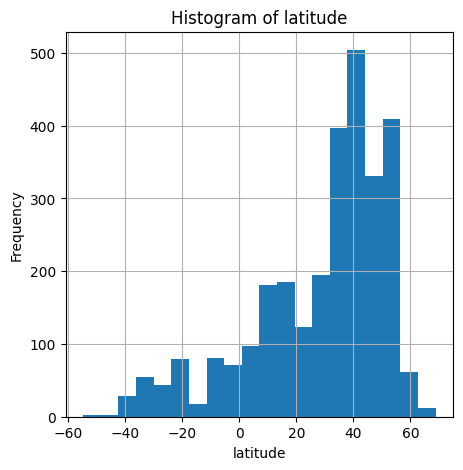

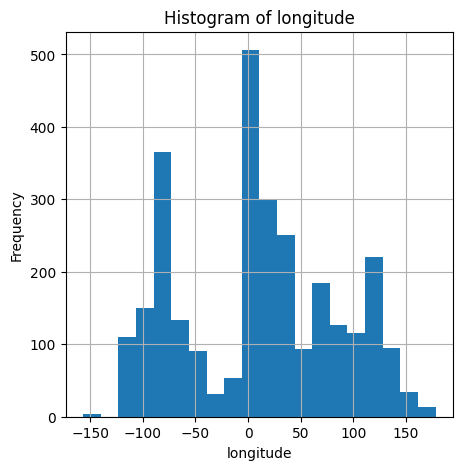

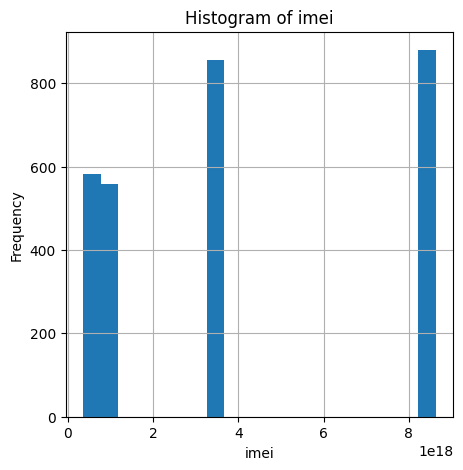

In [23]:
show_hist(data2_dupless)

## Dataset 3: **processes.csv**

In [24]:
data3 = pd.read_csv(folder / "processes.csv", delimiter="\t", parse_dates=['ts'])

data3.info()
# using the .info() method, we can see the types of the columns -> they are correct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ts                          15068 non-null  datetime64[ns]
 1   imei                        15068 non-null  int64         
 2   mwra                        15068 non-null  float64       
 3   p.android.chrome            15068 non-null  float64       
 4   p.android.documentsui       15068 non-null  float64       
 5   p.android.packageinstaller  15068 non-null  float64       
 6   p.android.settings          15068 non-null  float64       
 7   p.android.gm                15068 non-null  float64       
 8   p.android.externalstorage   15068 non-null  float64       
 9   p.system                    15068 non-null  float64       
 10  p.android.gms               15068 non-null  float64       
 11  p.dogalize                  15068 non-null  float64   

In [25]:
data3.describe()

,ts,imei,mwra,p.android.chrome,p.android.documentsui,p.android.packageinstaller,p.android.settings,p.android.gm,p.android.externalstorage,p.system,...,p.katana,p.google,p.notifier,p.android.defcontainer,p.android.vending,p.inputmethod.latin,p.simulator,p.olauncher,p.browser.provider,p.gms.persistent
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,...,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,13.014366,11.873133,12.413431,11.775762,11.884577,13.565926,13.045076,...,57.771071,50.500848,51.616398,49.479308,50.036077,49.662188,50.022369,50.280685,49.802585,49.596038
min,2018-05-05 10:00:00,3.590434e+17,0.000000,3.966290,1.559730,1.007100,3.161590,4.495340,2.811670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,11.241000,9.978880,10.472025,9.898315,10.061623,12.042350,11.304398,...,49.853383,41.479760,42.143080,24.496468,24.995170,24.685540,24.875740,25.251340,25.369325,24.121492
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,13.145975,11.956695,12.503790,11.470175,11.614480,13.734705,13.316080,...,57.815155,50.508840,51.530220,49.266070,50.377720,49.267805,50.384910,50.065190,49.893115,50.034575
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,14.847605,13.868025,14.388110,13.404352,13.596625,15.226465,14.960355,...,65.631797,59.638595,60.987575,74.711660,75.068038,74.860000,74.912595,75.308072,74.213670,74.835037
max,2018-05-15 18:08:00,8.630331e+18,1.000000,21.390630,19.398150,22.167830,23.608310,21.760910,21.647200,22.044580,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.581229,2.629561,2.734532,2.684841,2.499453,2.487413,2.712061,...,11.602200,13.416643,14.111102,28.947431,28.856000,28.973659,28.961131,28.825625,28.700681,29.069049


In [26]:
print(data3.dtypes) # checking the types one more time -> they are correct

ts                            datetime64[ns]
imei                                   int64
mwra                                 float64
p.android.chrome                     float64
p.android.documentsui                float64
p.android.packageinstaller           float64
p.android.settings                   float64
p.android.gm                         float64
p.android.externalstorage            float64
p.system                             float64
p.android.gms                        float64
p.dogalize                           float64
p.process.gapps                      float64
p.katana                             float64
p.google                             float64
p.notifier                           float64
p.android.defcontainer               float64
p.android.vending                    float64
p.inputmethod.latin                  float64
p.simulator                          float64
p.olauncher                          float64
p.browser.provider                   float64
p.gms.pers

### Dataset má vhodnú štruktúru dát -> typy stĺpcov sú korektné

In [27]:
data3.isna().sum()

ts                            0
imei                          0
mwra                          0
p.android.chrome              0
p.android.documentsui         0
p.android.packageinstaller    0
p.android.settings            0
p.android.gm                  0
p.android.externalstorage     0
p.system                      0
p.android.gms                 0
p.dogalize                    0
p.process.gapps               0
p.katana                      0
p.google                      0
p.notifier                    0
p.android.defcontainer        0
p.android.vending             0
p.inputmethod.latin           0
p.simulator                   0
p.olauncher                   0
p.browser.provider            0
p.gms.persistent              0
dtype: int64

### V datasete sa nenachádzajú chýbajúce hodnoty.

In [51]:
# now lets check for duplicates in the dataset (firstly in rows)
print(f'count of duplicated rows: {data3.duplicated().sum()}')
# we can see that there are 179 duplicated rows

# we will drop the duplicate to silve this issue
data3_dupless = data3.loc[~data3.duplicated(), :]

# now we will check again for the duplicates
print(f'count of duplicated rows after clearing: {data3_dupless.duplicated().sum()}')

count of duplicated rows: 179
count of duplicated rows after clearing: 0


### Dataset obsahoval duplicitné riadky, preto sme ich z neho odstránili. Po vymazaní je duplikátov v riadkoch 0.

In [52]:
# now lets check for duplicates in the columns
print(f'count of duplicated columns: {data3_dupless.columns.duplicated().sum()}')


# as we can see, there are no duplicates in the columns

count of duplicated columns: 0


In [53]:
# now we will be checking for outliers in the dataset
print_outliers_stat(data3_dupless)

imei: 0 => 0.00%
mwra: 0 => 0.00%
p.android.chrome: 52 => 0.35%
p.android.documentsui: 12 => 0.08%
p.android.packageinstaller: 36 => 0.24%
p.android.settings: 170 => 1.14%
p.android.gm: 50 => 0.34%
p.android.externalstorage: 214 => 1.44%
p.system: 117 => 0.79%
p.android.gms: 139 => 0.93%
p.dogalize: 2145 => 14.41%
p.process.gapps: 94 => 0.63%
p.katana: 102 => 0.69%
p.google: 94 => 0.63%
p.notifier: 105 => 0.71%
p.android.defcontainer: 0 => 0.00%
p.android.vending: 0 => 0.00%
p.inputmethod.latin: 0 => 0.00%
p.simulator: 0 => 0.00%
p.olauncher: 0 => 0.00%
p.browser.provider: 0 => 0.00%
p.gms.persistent: 0 => 0.00%


In [58]:
# now lets check for mixed data types

def check_mixed_types(df):
    for column in df.columns:
        unique_types = df[column].apply(type).unique()
        if len(unique_types) > 1:
            print(f'Column: {column} has mixed types: {unique_types}')
        else:
            print(f'Column: {column} has only one type: {unique_types}')

check_mixed_types(data3_dupless)

Column: ts has only one type: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Column: imei has only one type: [<class 'int'>]
Column: mwra has only one type: [<class 'float'>]
Column: p.android.chrome has only one type: [<class 'float'>]
Column: p.android.documentsui has only one type: [<class 'float'>]
Column: p.android.packageinstaller has only one type: [<class 'float'>]
Column: p.android.settings has only one type: [<class 'float'>]
Column: p.android.gm has only one type: [<class 'float'>]
Column: p.android.externalstorage has only one type: [<class 'float'>]
Column: p.system has only one type: [<class 'float'>]
Column: p.android.gms has only one type: [<class 'float'>]
Column: p.dogalize has only one type: [<class 'float'>]
Column: p.process.gapps has only one type: [<class 'float'>]
Column: p.katana has only one type: [<class 'float'>]
Column: p.google has only one type: [<class 'float'>]
Column: p.notifier has only one type: [<class 'float'>]
Column: p.android.defcontainer 

## Aj napriek tomu, že stĺpce majú určené typy, sme skontrolovali stĺpce po riadku a v prípade výskytu **nejednotných hodnôt** by nám to funkcia **check_mixed_types()** ukázala.

In [59]:
# now we check outliers in the dataset
print_outliers_stat(data3_dupless)

imei: 0 => 0.00%
mwra: 0 => 0.00%
p.android.chrome: 52 => 0.35%
p.android.documentsui: 12 => 0.08%
p.android.packageinstaller: 36 => 0.24%
p.android.settings: 170 => 1.14%
p.android.gm: 50 => 0.34%
p.android.externalstorage: 214 => 1.44%
p.system: 117 => 0.79%
p.android.gms: 139 => 0.93%
p.dogalize: 2145 => 14.41%
p.process.gapps: 94 => 0.63%
p.katana: 102 => 0.69%
p.google: 94 => 0.63%
p.notifier: 105 => 0.71%
p.android.defcontainer: 0 => 0.00%
p.android.vending: 0 => 0.00%
p.inputmethod.latin: 0 => 0.00%
p.simulator: 0 => 0.00%
p.olauncher: 0 => 0.00%
p.browser.provider: 0 => 0.00%
p.gms.persistent: 0 => 0.00%


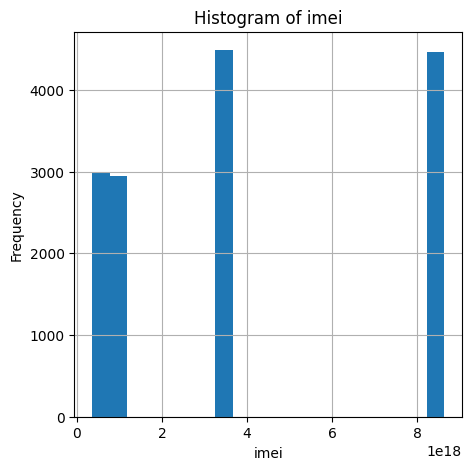

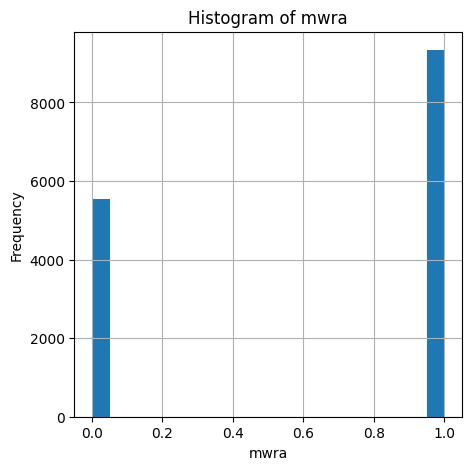

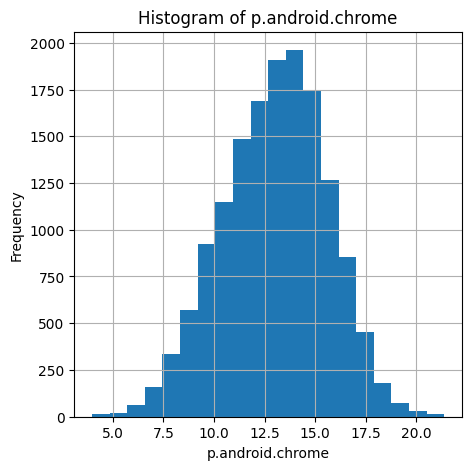

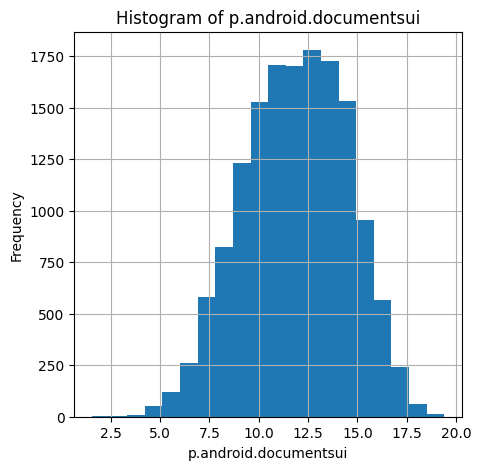

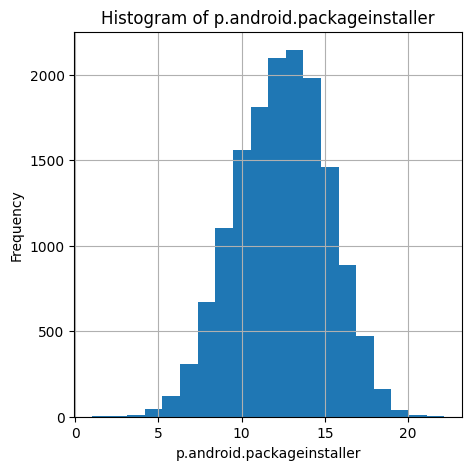

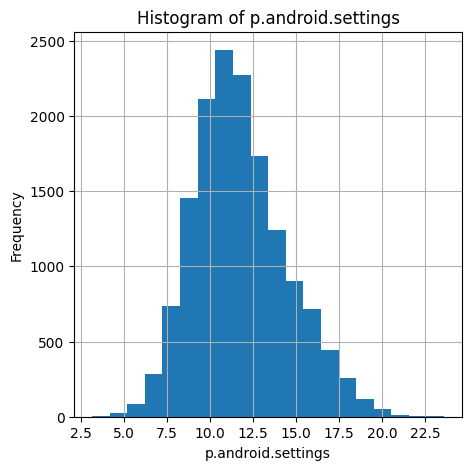

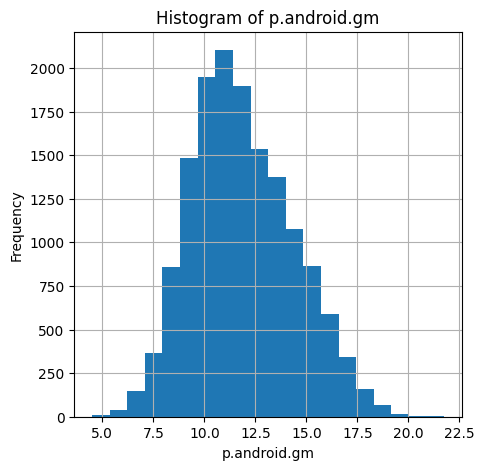

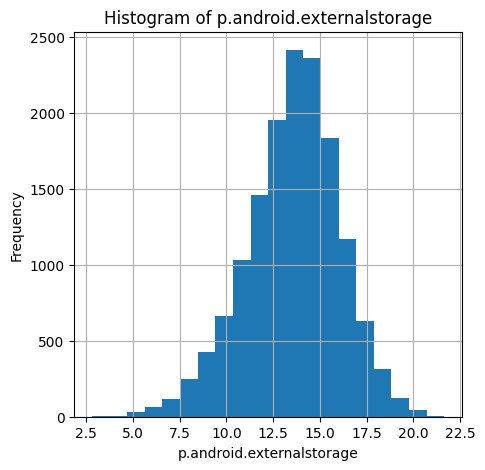

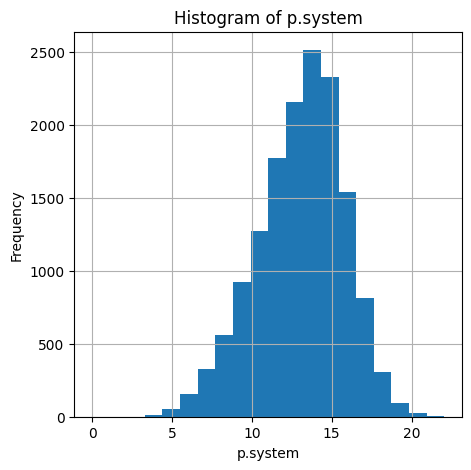

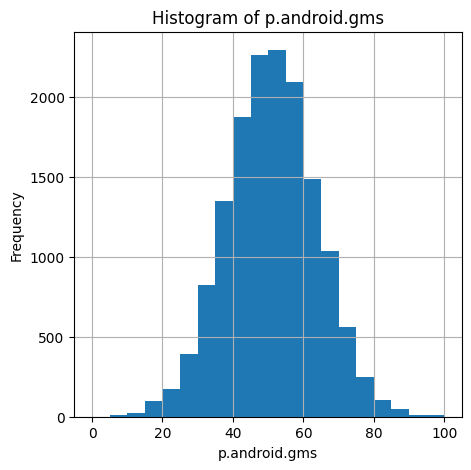

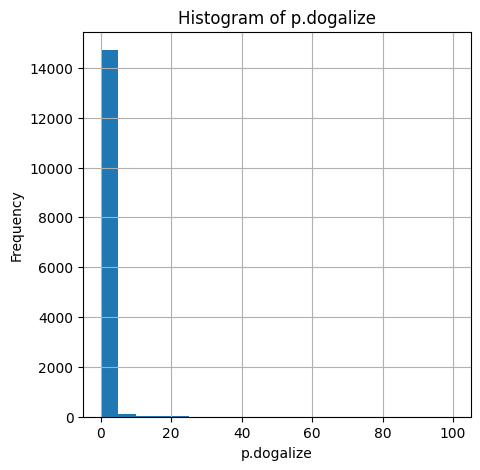

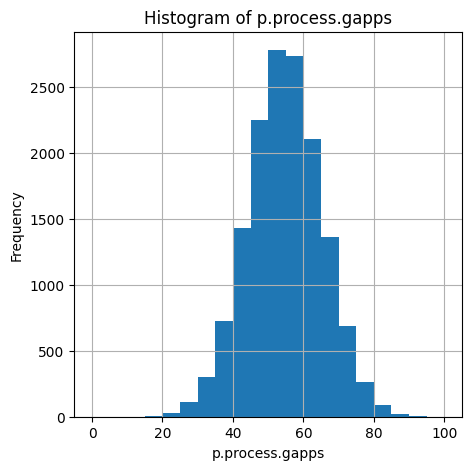

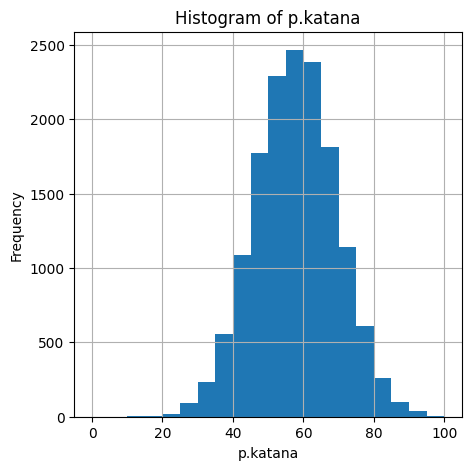

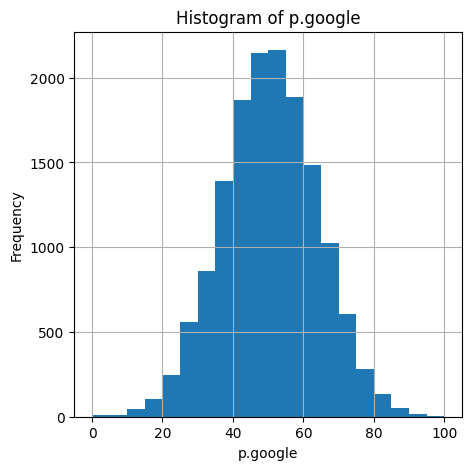

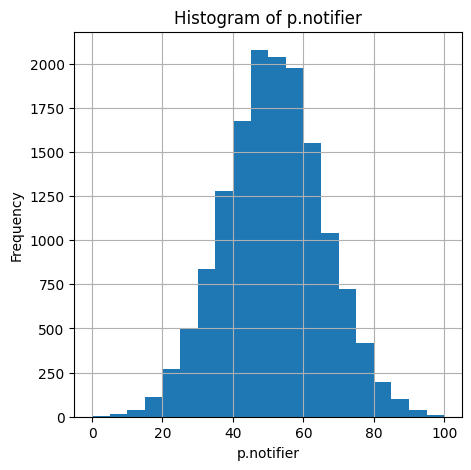

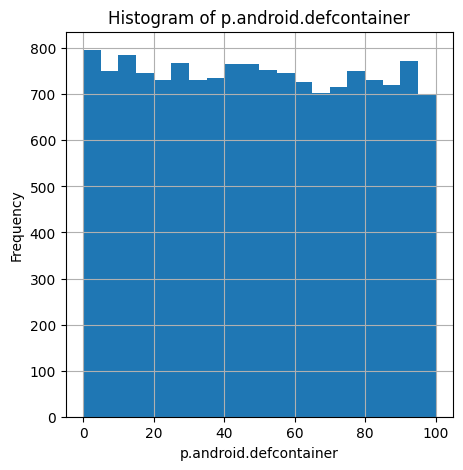

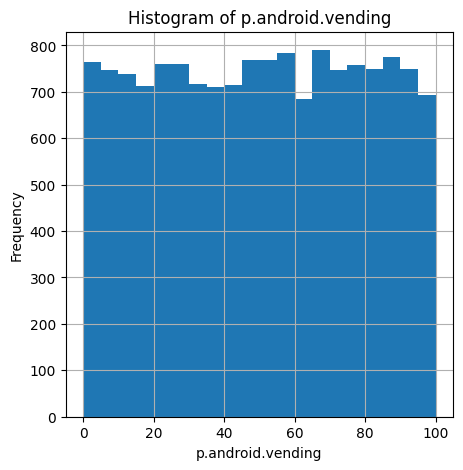

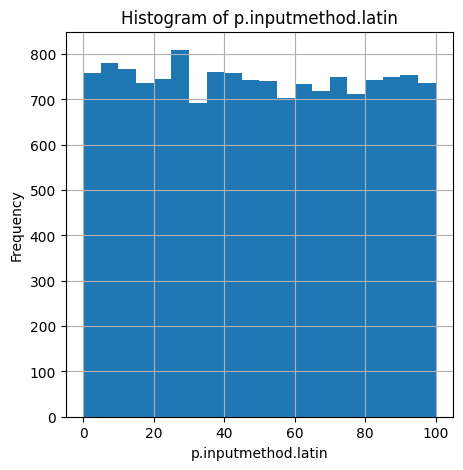

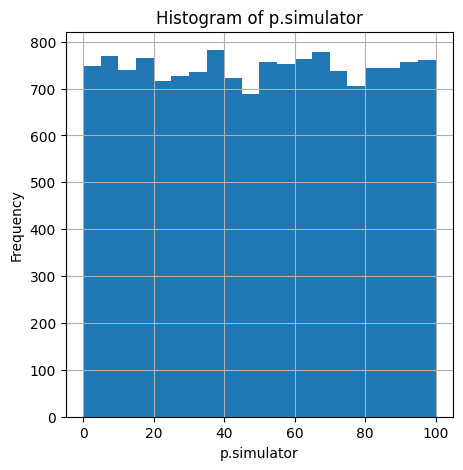

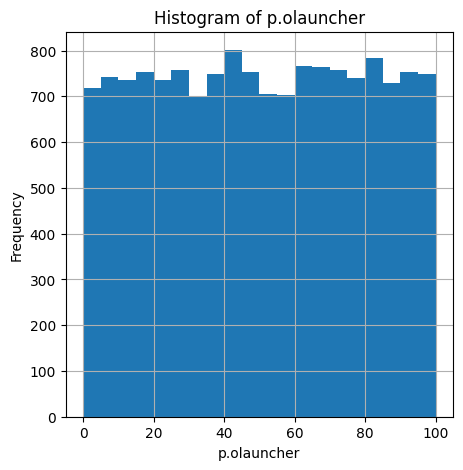

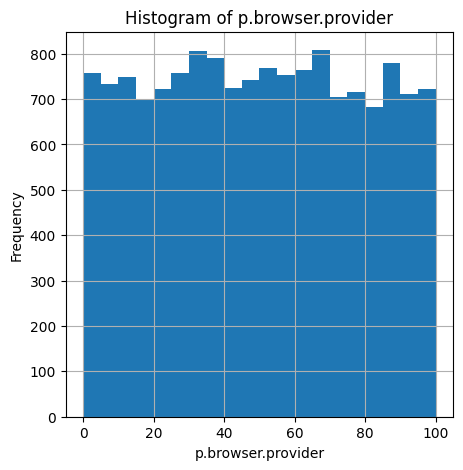

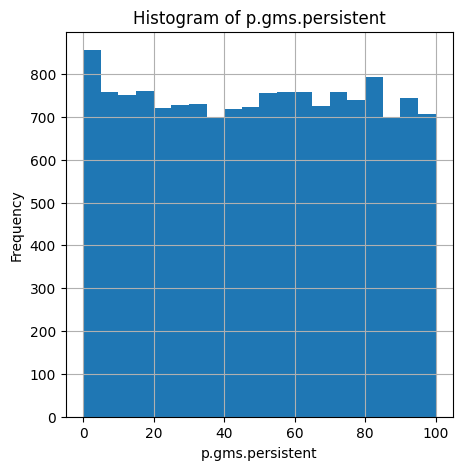

In [54]:
# we will visualize the data in histograms 
show_hist(data3_dupless)

## Dataset 4: **profiles.csv**

In [32]:
data4 = pd.read_csv(folder / "profiles.csv", delimiter="\t")

data4.info()

# print(data4.shape)
# print(len(data4['imei'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   address           2219 non-null   object
 1   job               783 non-null    object
 2   birthdate         1436 non-null   object
 3   name              2611 non-null   object
 4   registration      2611 non-null   object
 5   imei              2611 non-null   int64 
 6   ssn               2611 non-null   object
 7   username          2611 non-null   object
 8   user_id           2611 non-null   int64 
 9   company           2611 non-null   object
 10  current_location  2480 non-null   object
 11  mail              2611 non-null   object
dtypes: int64(2), object(10)
memory usage: 244.9+ KB


In [33]:
data4.describe()

,imei,user_id
count,2.611000e+03,2611.000000
mean,3.840125e+18,1334.298353
std,3.322799e+18,761.287518
min,3.590434e+17,0.000000
25%,8.630331e+17,684.500000
50%,3.590434e+18,1357.000000
75%,8.630331e+18,1981.000000
max,8.630331e+18,2610.000000


In [34]:
print(data4.dtypes)

address             object
job                 object
birthdate           object
name                object
registration        object
imei                 int64
ssn                 object
username            object
user_id              int64
company             object
current_location    object
mail                object
dtype: object


In [35]:
data4.isna().sum()

address              392
job                 1828
birthdate           1175
name                   0
registration           0
imei                   0
ssn                    0
username               0
user_id                0
company                0
current_location     131
mail                   0
dtype: int64

In [36]:
print(f'count of duplicated rows {data4.duplicated().sum()}')
# there are no duplicates in this dataset

count of duplicated rows 0


In [46]:
# now lets check for columns 
print(f'count of duplicated columns {data4.columns.duplicated().sum()}')

count of duplicated columns 0


In [49]:
# now we will check for outliers in the dataset
print_outliers_stat(data4)

imei: 0 => 0.00%
user_id: 0 => 0.00%


## V datasete niesú žiadne duplikáty - ani pre rows ani pre columns

- (B-2b) Chýbajúce hodnoty (missing values): vyskúšajte riešiť problém min. 2 technikami odstránenie pozorovaní s chýbajúcimi údajmi nahradenie chýbajúcej hodnoty napr. mediánom, priemerom, pomerom, interpoláciou, alebo kNN


In [37]:
# there are missing values in dataset devices.csv
data2.isna().sum() 
# code is an object type attribute so we cant
# change the missing value to a mean or median

latitude      0
longitude     0
store_name    0
code          2
location      0
imei          0
continent     0
city          0
dtype: int64

In [38]:
# there are 2 missing values in code attributes lets see if we clip it or keep it 
data2_dupless[data2_dupless['code'].isnull()]
# we need to first add the category AC in code categories
data2_dupless['code'] = data2_dupless['code'].cat.add_categories(['AC'])


/var/folders/10/wqhyz3xd4fg4zbgd_cmlcghr0000gn/T/ipykernel_29390/1190482417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_dupless['code'] = data2_dupless['code'].cat.add_categories(['AC'])


In [39]:

data2_dupless.loc[data2_dupless['location'] == 'Africa/Windhoek', 'code'] = 'AC'
data2_dupless.loc[data2_dupless['code'] == 'AC']

,latitude,longitude,store_name,code,location,imei,continent,city
370,-21.98333,16.91667,Okahandja,AC,Africa/Windhoek,863033069630348446,Africa,Windhoek
1873,-21.98333,16.91667,Okahandja,AC,Africa/Windhoek,863033069630348123,Africa,Windhoek


- (C-1b) Vychýlené hodnoty (outlier detection), vyskúšajte riešiť problém min. 2 technikami odstránenie vychýlených alebo odľahlých pozorovaní nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (napr. 5%, 95%)

In [40]:
# in dataset connections.csv there are outliers in attribute c.android.youtube
print_outliers_stat(data1_dupless)
# by this stats we can clip the outliers

imei: 0 => 0.00%
mwra: 0 => 0.00%
c.android.youtube: 148 => 0.99%
c.katana: 47 => 0.32%
c.dogalize: 152 => 1.02%
c.android.chrome: 71 => 0.48%
c.android.gm: 8 => 0.05%
c.UCMobile.x86: 0 => 0.00%
c.raider: 0 => 0.00%
c.android.vending: 0 => 0.00%
c.updateassist: 0 => 0.00%
c.UCMobile.intl: 0 => 0.00%


<Axes: xlabel='c.android.youtube', ylabel='Count'>

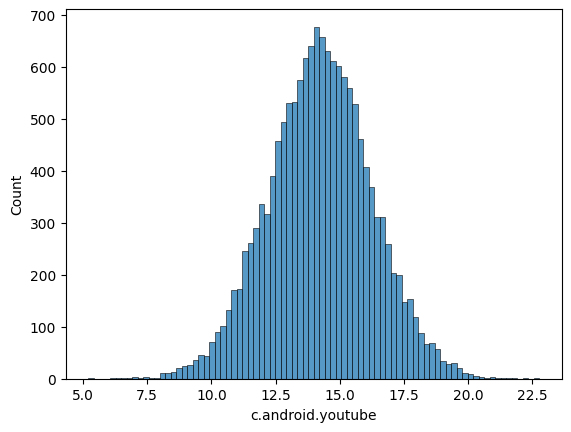

In [41]:
sns.histplot(data=data1_dupless['c.android.youtube'])

<Axes: xlabel='c.android.youtube', ylabel='Count'>

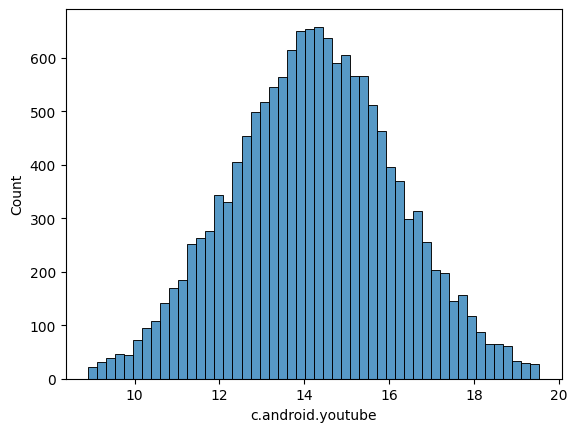

In [42]:
# clipping outliers
data1_dupless_clip = data1_dupless.drop(identify_outliers(data1_dupless['c.android.youtube']).index)
sns.histplot(data=data1_dupless_clip['c.android.youtube'])

In [43]:
# the other method would be replacing the outliers with
# limit values (whiskers) 5% and 95%
